In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# 设置全局字体
matplotlib.rcParams["font.family"] = "SimSun"


# def ts_profiling(df: pd.DataFrame, output_file: str = "profiling_report.html") -> None:
#     profile = ydata_profiling.ProfileReport(df, tsmode=True)
#     profile.to_file(output_file)


raw_data = pd.read_csv(r"data\qiyeshuju-4S间隔.csv", encoding="gbk")
raw_data.index = pd.to_datetime(raw_data["时间"])
raw_data.drop("时间", axis=1, inplace=True)

raw_data.drop(columns=["右侧换火信号"],inplace=True)

columns = raw_data.columns
print(columns)

Index(['CEMS出口烟尘($mg/m^{3}$)', 'CEMS出口一氧化氮($mg/m^{3}$)', 'VA.SO2($mg/m^{3}$)',
       'VA.NOX($mg/m^{3}$)', 'CEMS出口含氧(%)', 'VA.O2(%)', 'NOX转换值($mg/m^{3}$)',
       '氨水泵B频率反馈(Hz)', '1#线氨水流量(L/h)', 'C泵频率反馈(Hz)', '反应塔入口温度',
       '1#线氨水调节阀(L/h)', '反应塔出口温度', 'CCF出口温度', '氨水分段设定反馈($m^{3}/h$)', 'CCF6温度',
       'CCF5温度', 'CCF4温度', 'CCF3温度', 'CCF2温度', '出口CEMS温度', 'CCF1温度', 'CCF7温度',
       '喷氨压缩空气压力', 'CCF1差压', 'CCF2差压', 'CCF3差压', 'CCF4差压', 'CCF5差压', '反应塔差压',
       'CCF6差压', 'B变频器电流(A)', 'A变频器电流(A)', 'B输出频率(Hz)', '氨逃逸小时均值($mg/m^{3}$)',
       'A输出频率(Hz)', 'CCF7差压', '烟气量($Nm^{3}/h$)', 'CCF出口压力', 'CEMS出口流量(m/s)',
       '22出口CEMS温度', '22CEMS出口烟尘($mg/m^{3}$)', '出口CEMS湿度(%)',
       '22烟气量($Nm^{3}/h$)', '右侧换火信号-数值'],
      dtype='object')


In [6]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(50, 50))
threshold = 0.8

corr_matrix = raw_data.corr()

# sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
# high_corr_factors = []
# for i in range(len(corr_matrix.columns)):
#     for j in range(i+1, len(corr_matrix.columns)):
#         if abs(corr_matrix.iloc[i, j]) > threshold:
#             factor_pair = (corr_matrix.columns[i], corr_matrix.columns[j])
#             high_corr_factors.append(factor_pair)
# df_filtered = [list(set(sum(high_corr_factors, ())))]

# print(high_corr_factors)


high_corr_factors = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            factor_pair = (corr_matrix.columns[i], corr_matrix.columns[j])
            high_corr_factors.append(factor_pair)

df_filtered = raw_data[list(set(sum(high_corr_factors, ())))].corr()
mask = np.triu(np.ones_like(df_filtered, dtype=bool))
sns.heatmap(df_filtered,annot=True, cmap="YlGnBu",mask=mask)


c:\Users\glx\anaconda3\envs\mr\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

c:\Users\glx\anaconda3\envs\mr\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\glx\anaconda3\envs\mr\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


c:\Users\glx\anaconda3\envs\mr\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

c:\Users\glx\anaconda3\envs\mr\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\glx\anaconda3\envs\mr\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


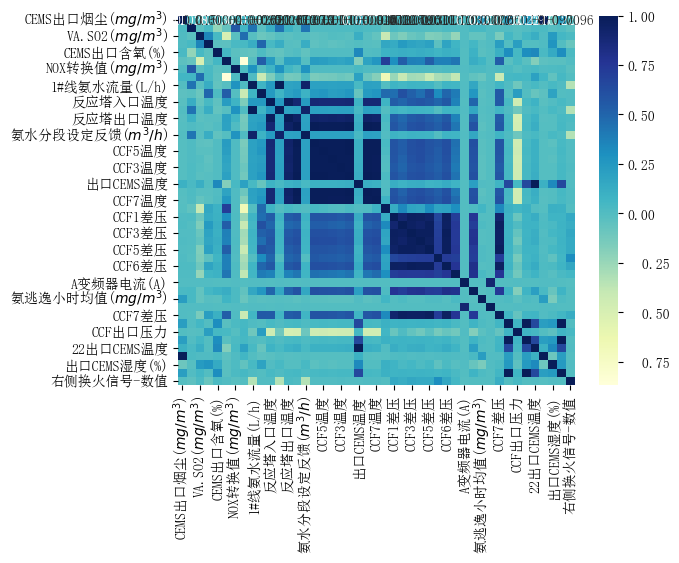

In [10]:
import seaborn as sns


corr_matrix = raw_data.corr()

# sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
high_corr_factors = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            factor_pair = (corr_matrix.columns[i], corr_matrix.columns[j])
            high_corr_factors.append(factor_pair)

df_filtered = raw_data[list(set(sum(high_corr_factors, ())))]

sns.heatmap(df_filtered.corr(), annot=True, cmap='coolwarm')
corr_matrix.columns
